<a href="https://colab.research.google.com/github/martinmaturana777/Proyecto-M-dulo/blob/main/Proyecto_Colapso_Gravitacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install h5py

In [ ]:

pip install amuse-framework

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.2/679.2 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools_scm-8.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools_scm-8.1.0-py3-none-any.whl (43 kB)
  Created wheel for amuse-framework: filename=amuse_framework-2024.6.0-py3-none-any.whl size=629879 sha256=7c85140b8c147c8fdf02788ac7f0c3e24adb7c3bd6be8288b620697cfbf70e7f
  Stored in directory: /root/.cache/pip/wheels/96/a7/96/08b4505f65a31c950a9ef03d5cf092aaa1b151d1bdd9b30503
Successfully built amuse-framework


In [ ]:
pip install amuse-hop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for amuse-hop: filename=amuse_hop-2024.6.0-py3-none-any.whl size=283983 sha256=ff9954fb05ac9db3a2c43ffa2a87562170ddeb7670369336646bdb260c4dadc4
  Stored in directory: /root/.cache/pip/wheels/73/31/6b/467ee0f2dd632303f721dda9bf1ddc9cf0b0c003f7f812c28a
Successfully built amuse-hop


In [ ]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import amuse
import amuse.io
from amuse.units import units
from amuse.units import constants
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


In [ ]:
import multiprocessing as mp
import logging
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from amuse.io import read_set_from_file

In [ ]:
Path="/content/drive/MyDrive/sim2/sim2/"

In [ ]:
#Función para poder encontrar las 6 estrellas más cercanas
def closest_neighbours(x1,y1,z1,x,y,z):
  #centramos
    #trasladamos el origen
    xcenter = x.value_in(units.pc)-x1.value_in(units.pc)
    ycenter = y.value_in(units.pc)-y1.value_in(units.pc)
    zcenter = z.value_in(units.pc)-z1.value_in(units.pc)
    #distancia
    r = np.sqrt(xcenter**2 + ycenter**2 + zcenter**2)
    #ordenaos
    r.sort()
    return r[6]



In [ ]:
#transformar a función para poder iterar
def radios_lagrangianos(stars,x_cc,y_cc,z_cc):

      #listas de posiciones
        x = stars.x.value_in(units.pc)
        y = stars.y.value_in(units.pc)
        z = stars.z.value_in(units.pc)
        mass = stars.mass.value_in(units.kg)
      #centrar listas
        r_x = x-x_cc
        r_y = y-y_cc
        r_z = z-z_cc
      #distancias
        distancia_x = np.multiply(r_x,r_x)
        distancia_y = np.multiply(r_y,r_y)
        distancia_z = np.multiply(r_z,r_z)
      #Ordenar distancias
        r = np.sqrt(distancia_x + distancia_y + distancia_z)
        indices=np.argsort(r,kind='quicksort')
        r_ordenado=r[indices]
        x_ordenado=x[indices]
        y_ordenado=y[indices]
        z_ordenado=z[indices]
        mass_ordenado=mass[indices]
        #acumular
        acumulated_mass=np.cumsum(mass_ordenado)
        totalmass= np.sum(mass)
        acumulated_mass_porcentaje=acumulated_mass/totalmass
        acumulated_mass_porcentaje=acumulated_mass/totalmass
        indice_01=np.where(acumulated_mass_porcentaje>=0.1)[0][0]
        indice_50=np.where(acumulated_mass_porcentaje>=0.5)[0][0]
        indice_90=np.where(acumulated_mass_porcentaje>=0.9)[0][0]
        radio_01= r_ordenado[indice_01]
        radio_50= r_ordenado[indice_50]
        radio_90= r_ordenado[indice_90]
        radios_lagrangianos = [radio_01,radio_50,radio_90]
        return radios_lagrangianos

In [ ]:
star = read_set_from_file(Path + 'Stars_0.hdf5', format='hdf5')
radios_lagrangianos(star,0.00033812464848071528,7.9592404168718926e-05,0.0001813587533468915)
star.all_attributes()


['key',
 'mass',
 'potential_in_code',
 'radius',
 'timestep',
 'vx',
 'vy',
 'vz',
 'x',
 'y',
 'z',
 'acceleration',
 'LagrangianRadii',
 'center_of_mass_velocity',
 'densitycentre_coreradius_coredens',
 'distances_squared',
 'thermal_energy',
 'Qparameter',
 'box_counting_dimension',
 'natal_kick_velocity',
 'dynamical_timescale',
 'angular_momentum',
 'virial_radius',
 'potential_energy',
 'get_binaries',
 'find_closest_particle_to',
 'correlation_dimension',
 'specific_kinetic_energy',
 'rotate',
 'new_particle_from_cluster_core',
 'cluster_core',
 'velocity',
 'center_of_mass',
 'potential',
 'total_momentum',
 'bound_subset',
 'scale_to_standard',
 'nearest_neighbour',
 'mass_segregation_from_nearest_neighbour',
 'moment_of_inertia',
 'oblateness',
 'binaries',
 'mass_segregation_ratio',
 'kinetic_energy',
 'total_mass',
 'minimum_spanning_tree_length',
 'position',
 'connected_components',
 'total_angular_momentum',
 'total_radius',
 'mass_segregation_Gini_coefficient',
 'add_s

In [ ]:
#objeto más masiva en el momento
def most_massive(star):
    mass = np.max(star.mass.value_in(units.kg))
    indice = np.where(star.mass.value_in(units.kg) == mass)
    x = star.x.value_in(units.pc)[indice][0]
    y = star.y.value_in(units.pc)[indice][0]
    z = star.z.value_in(units.pc)[indice][0]
    return [mass,x,y,z]


In [ ]:
#lagrange entre 50 y 90
def lagrange75(star,x_cc,y_cc,z_cc):
  #listas de posiciones
    x = star.x.value_in(units.pc)
    y = star.y.value_in(units.pc)
    z = star.z.value_in(units.pc)
    mass = star.mass.value_in(units.kg)
  #centrar listas
    r_x = x-x_cc
    r_y = y-y_cc
    r_z = z-z_cc
    distancia_x = np.multiply(r_x,r_x)
    distancia_y = np.multiply(r_y,r_y)
    distancia_z = np.multiply(r_z,r_z)
    #Ordenar distancias
    r = np.sqrt(distancia_x + distancia_y + distancia_z)
    indices=np.argsort(r,kind='quicksort')
    r_ordenado=r[indices]
    x_ordenado=x[indices]
    y_ordenado=y[indices]
    z_ordenado=z[indices]
    mass_ordenado=mass[indices]
        #acumular
    acumulated_mass=np.cumsum(mass_ordenado)
    totalmass= np.sum(mass)
    acumulated_mass_porcentaje=acumulated_mass/totalmass
    acumulated_mass_porcentaje=acumulated_mass/totalmass
    indice_60=np.where(acumulated_mass_porcentaje>=0.60)[0][0]
    indice_70=np.where(acumulated_mass_porcentaje>=0.70)[0][0]
    indice_80=np.where(acumulated_mass_porcentaje>=0.80)[0][0]
    radio_60= r_ordenado[indice_60]
    radio_70= r_ordenado[indice_70]
    radio_80= r_ordenado[indice_80]
    return [radio_60,radio_70,radio_80]


In [ ]:
#Trackeo del objeto más masivo final
def MMtracking(star):
    masas = star.mass.value_in(units.MSun)
    x = star.x.value_in(units.pc)[1777]
    y = star.y.value_in(units.pc)[1777]
    z = star.z.value_in(units.pc)[1777]
    return [x,y,z]
#print(MMtracking(read_set_from_file(Path + 'Stars_25817.hdf5', format='hdf5')))

In [ ]:
# Radio del cluster
def clusterRadius(star,xcc,ycc,zcc):
    x = star.x.value_in(units.pc) - xcc
    y = star.y.value_in(units.pc) - ycc
    z = star.z.value_in(units.pc) - zcc
    r = np.sqrt(x**2 + y**2 + z**2)
    return np.max(r)


In [ ]:
#Tiempo de relajación
def RelaxtimeMM(star,xcc,ycc,zcc):
    v = np.sqrt(star.velocity.x.value_in(units.pc/units.s)[1777]**2 +
             star.velocity.y.value_in(units.pc/units.s)[1777]**2 +
             star.velocity.z.value_in(units.pc/units.s)[1777]**2)
    t = clusterRadius(star,xcc,ycc,zcc)/v
    T_R = 2000*t/(6*np.log(2000))
    return T_R

In [ ]:
#Procesos extra
def process_newRLandMMTR(i):
  logging.info(f"Procesando archivo {i}...")
  star = read_set_from_file(Path + f'Stars_{i}.hdf5', format='hdf5')
  x = star.x.value_in(units.pc)
  y = star.y.value_in(units.pc)
  z = star.z.value_in(units.pc)
  r_6i = [closest_neighbours(k.x, k.y, k.z, star.x, star.y, star.z) for k in star]
  r_6i3 = np.multiply(np.multiply(r_6i, r_6i), r_6i)
  x_cc = (np.sum(x / r_6i3)) / np.sum(1 / r_6i3)
  y_cc = (np.sum(y / r_6i3)) / np.sum(1 / r_6i3)
  z_cc = (np.sum(z / r_6i3)) / np.sum(1 / r_6i3)
  RL = lagrange75(star,x_cc,y_cc,z_cc)
  MM = MMtracking(star)
  T_R = RelaxtimeMM(star,x_cc,y_cc,z_cc)
  return{'datasets': f'Stars_{i}', 'RL 60%': RL[0], 'RL 70%': RL[1], 'RL 80%': RL[2], 'MMx': MM[0], 'MMy': MM[1], 'MMz': MM[2], 'Relax time': T_R}


In [ ]:
#Multi processing

folder_path = Path
file_path= os.path.join(folder_path, 'MMtrakc75radiLMtrack.csv')
if __name__ == '__main__':
    # Número de procesos paralelos (limitar a 2 para Colab gratuito)
    num_processes = 2  # Colab gratuito tiene 2 núcleos

    # Índices de los archivos HDF5
    indices = np.arange(0, 25818, dtype=None)  # Reemplaza con el rango de tus archivos

    # Procesar los archivos en paralelo
    with mp.Pool(processes=num_processes) as pool:
        results = []
        for result in pool.imap(process_newRLandMMTR, indices):
            print(result)
            results.append(result)
            logging.info(f"Resultado recibido para archivo {result['datasets']}")

    # Convertir resultados a DataFrame de pandas
    data = pd.DataFrame(results)
    print(data)



    data.to_csv(file_path, index=False)

Streaming output truncated to the last 5000 lines.
{'datasets': 'Stars_20845', 'RL 60%': 0.26991535977742337, 'RL 70%': 0.44479899643029508, 'RL 80%': 1.8263662879029385, 'MMx': -0.59982412085190695, 'MMy': 0.22427540940416649, 'MMz': -0.26953093540333689, 'Relax time': 2550237303291940.0}
{'datasets': 'Stars_20846', 'RL 60%': 0.2697864893009051, 'RL 70%': 0.44506418854824076, 'RL 80%': 1.8263733632529675, 'MMx': -0.60028300555817815, 'MMy': 0.22419549503352834, 'MMz': -0.27003964871472969, 'Relax time': 2559921519602282.5}
{'datasets': 'Stars_20847', 'RL 60%': 0.26961883165527095, 'RL 70%': 0.44518116981314237, 'RL 80%': 1.8263471411166614, 'MMx': -0.60072352699202913, 'MMy': 0.22420405435701699, 'MMz': -0.27051057364601755, 'Relax time': 2584378580306793.5}
{'datasets': 'Stars_20848', 'RL 60%': 0.26950587633050177, 'RL 70%': 0.44524865640196915, 'RL 80%': 1.8263162054932425, 'MMx': -0.6011219840489278, 'MMy': 0.22427805711959925, 'MMz': -0.27092267146832938, 'Relax time': 26177962152

In [ ]:
#Proceso de los archivos
def process_file(i):
    logging.info(f"Procesando archivo {i}...")



    # Cargar el archivo HDF5
    star = read_set_from_file(Path + f'Stars_{i}.hdf5', format='hdf5')
    x = star.x.value_in(units.pc)
    y = star.y.value_in(units.pc)
    z = star.z.value_in(units.pc)

    # Cálculo de distancias al sexto vecino más cercano
    r_6i = [closest_neighbours(k.x, k.y, k.z, star.x, star.y, star.z) for k in star]
    r_6i3 = np.multiply(np.multiply(r_6i, r_6i), r_6i)

    # Cálculo de centro de concentración
    x_cc = (np.sum(x / r_6i3)) / np.sum(1 / r_6i3)
    y_cc = (np.sum(y / r_6i3)) / np.sum(1 / r_6i3)
    z_cc = (np.sum(z / r_6i3)) / np.sum(1 / r_6i3)

    # Cálculo de centro de masa
    mass = star.mass.value_in(units.kg)
    x_cm = (np.sum(x * mass)) / np.sum(mass)
    y_cm = (np.sum(y * mass)) / np.sum(mass)
    z_cm = (np.sum(z * mass)) / np.sum(mass)

    #Radios lagrangeanos
    RL = radios_lagrangianos(star,x_cc,y_cc,z_cc)

    #Energía
    KE = star.kinetic_energy()
    PE = star.potential_energy()
    TE = KE.value_in(units.J) + PE.value_in(units.J)

    #Monitoreo del objeto más masivo
    mm = most_massive(star)
    mass = mm[0]
    mmx = mm[1]
    mmy = mm[2]
    mmz = mm[3]
    # Devolver resultados
    return {'datasets': f'Stars_{i}', 'x_cc': x_cc, 'y_cc': y_cc, 'z_cc': z_cc,
            'x_cm': x_cm, 'y_cm': y_cm, 'z_cm': z_cm, 'RL_10%':RL[0], 'RL_50%': RL[1],
            'RL_90%': RL[2],'Energy': TE, 'most_massive(m)': mass, 'most_massive(x)':mmx,
            'most_massive(y)':mmy, 'most_massive(z)':mmz}

In [ ]:
#Multi processing

folder_path = Path
file_path= os.path.join(folder_path, 'cc_and_cm.csv')
if __name__ == '__main__':
    # Número de procesos paralelos (limitar a 2 para Colab gratuito)
    num_processes = 2  # Colab gratuito tiene 2 núcleos

    # Índices de los archivos HDF5
    indices = np.arange(0, 25818, dtype=None)  # Reemplaza con el rango de tus archivos

    # Procesar los archivos en paralelo
    with mp.Pool(processes=num_processes) as pool:
        results = []
        for result in pool.imap(process_file, indices):
            print(result)
            results.append(result)
            logging.info(f"Resultado recibido para archivo {result['datasets']}")

    # Convertir resultados a DataFrame de pandas
    data = pd.DataFrame(results)
    print(data)



    data.to_csv(file_path, index=False)

Streaming output truncated to the last 5000 lines.
{'datasets': 'Stars_20858', 'x_cc': -0.60087556860255553, 'y_cc': 0.22385587656206393, 'z_cc': -0.27096569984639418, 'x_cm': -0.89734726600290238, 'y_cm': 0.12172047134788933, 'z_cm': -0.60202746313340094, 'RL_10%': 0.038010275883519476, 'RL_50%': 0.18515379832801329, 'RL_90%': 9.9807264181435649, 'Energy': 2.3552985421770806e+44, 'most_massive(m)': 8.9501400000000125e+33, 'most_massive(x)': -0.60032509340023743, 'most_massive(y)': 0.22851283830278782, 'most_massive(z)': -0.26902686249186147}
{'datasets': 'Stars_20859', 'x_cc': -0.60107326619675983, 'y_cc': 0.22381324743708414, 'z_cc': -0.27086784623593879, 'x_cm': -0.8974004054279302, 'y_cm': 0.12172924443876604, 'z_cm': -0.60205869780933807, 'RL_10%': 0.038210310636580584, 'RL_50%': 0.18509992612991796, 'RL_90%': 9.9812655014021168, 'Energy': 2.3552985423314654e+44, 'most_massive(m)': 8.9501400000000125e+33, 'most_massive(x)': -0.60029754315312167, 'most_massive(y)': 0.22851001376348

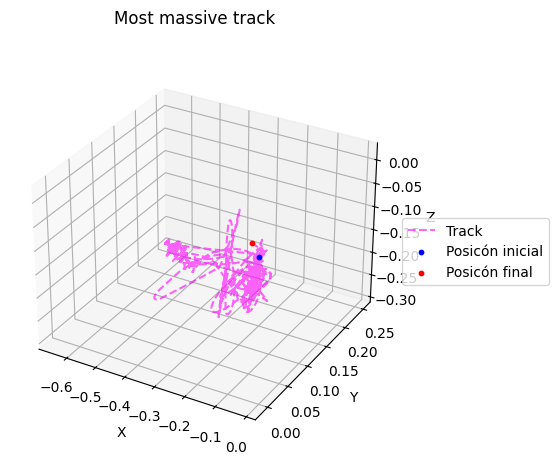

In [ ]:
#Most massive object track

x = DATA2['MMx']
y = DATA2['MMy']
z = DATA2['MMz']

fig = plt.figure(figsize=(6, 5))
fig.suptitle("Most massive track")

ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x, y, z, '--',alpha=0.6,label = 'Track',color='magenta')
ax.scatter(x[0], y[0], z[0], color='b', marker='o', label="Posicón inicial",s=10)  # Centro del clúster
ax.scatter(x[25817], y[25817], z[25817], color='r', marker='o', label="Posicón final",s=10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))
ax.set_zlim(min(z),max(z))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)

plt.show()

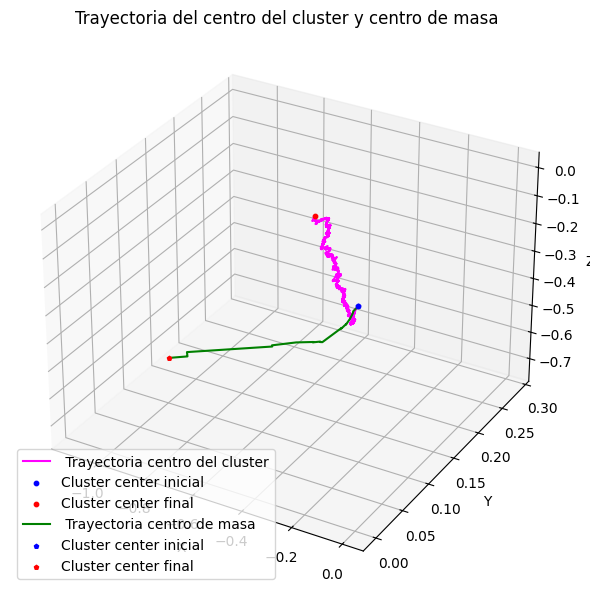

In [ ]:


ax = plt.figure(figsize=(10.8, 7.2)).add_subplot(projection='3d')
#ax1 = fig.add_subplot(122, projection='3d')
#ax2 = fig.add_subplot(222, projection='3d')
folder_path = Path
file_path= os.path.join(folder_path, 'cc_and_cm.csv')
data = pd.read_csv(file_path)


ax.plot3D(data['x_cc'], data['y_cc'], data['z_cc'],alpha=1,color='magenta',label = ' Trayectoria centro del cluster')
ax.scatter(data['x_cc'][0], data['y_cc'][0], data['z_cc'][0], color='b', marker='o', label="Cluster center inicial",s=10)  # Centro del clúster
ax.scatter(data['x_cc'][25817], data['y_cc'][25817], data['z_cc'][25817], color='r', marker='o', label="Cluster center final",s=10)

ax.plot3D(data['x_cm'], data['y_cm'], data['z_cm'], alpha=1,color='g',label = ' Trayectoria centro de masa')
ax.scatter(data['x_cm'][0], data['y_cm'][0], data['z_cm'][0], color='b', marker='p', label="Cluster center inicial",s=10)   #Centro de masa
ax.scatter(data['x_cm'][25817], data['y_cm'][25817], data['z_cm'][25817], color='r', marker='p', label="Cluster center final",s=10)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title('Trayectoria del centro del cluster y centro de masa')
ax.legend(loc='lower left')
ax.grid(True)


plt.show()


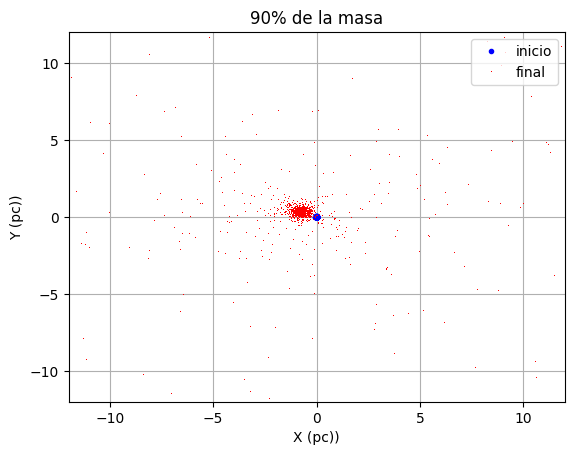

In [ ]:

plt.figure()

s0= read_set_from_file(Path + 'Stars_0.hdf5', format='hdf5')
s25817= read_set_from_file(Path + 'Stars_25817.hdf5', format='hdf5')
plt.title('Cluster estelar plano X-Y')
plt.title('90% de la masa')
x0 = s0.x.value_in(units.pc)
y0 = s0.y.value_in(units.pc)
xf = s25817.x.value_in(units.pc)
yf = s25817.y.value_in(units.pc)

plt.plot(x0,y0,'.',label = 'inicio',color = 'b')
plt.plot(xf,yf,',',label = 'final',color = 'r')
plt.xlim(-0.06,0.04)
plt.ylim(-0.04,0.08)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlim(-12,12)
plt.ylim(-12,12)
plt.xlabel('X (pc))')
plt.ylabel('Y (pc))')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()



In [ ]:
def kgtosm(kg):
    sm = 2*10**30
    return kg/sm

[  0.00000000e+00   1.00003873e+00   2.00007747e+00 ...,   2.58159999e+04
   2.58170000e+04   2.58180000e+04]


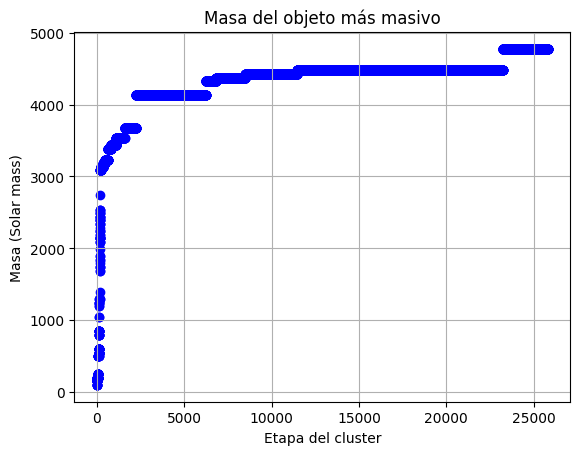

4773.408


In [ ]:
plt.figure()

x=np.linspace(0,25818,25818)
print(x)
plt.scatter(x,kgtosm(data['most_massive(m)']),color = 'b' )
plt.title('Masa del objeto más masivo')
plt.xlabel('Etapa del cluster')
plt.ylabel('Masa (Solar mass)')
plt.grid(True)
plt.show()

print(kgtosm(data['most_massive(m)'][25817]))

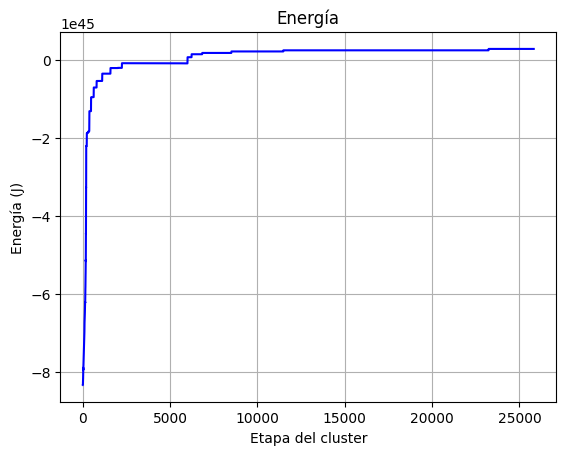

In [ ]:

    plt.figure()
    #plt.yscale('log')
    plt.plot(x,data['Energy'],color = 'b'  )
    plt.title('Energía')
    plt.xlabel('Etapa del cluster')
    plt.ylabel('Energía (J)')

    plt.grid(True)
    plt.show()



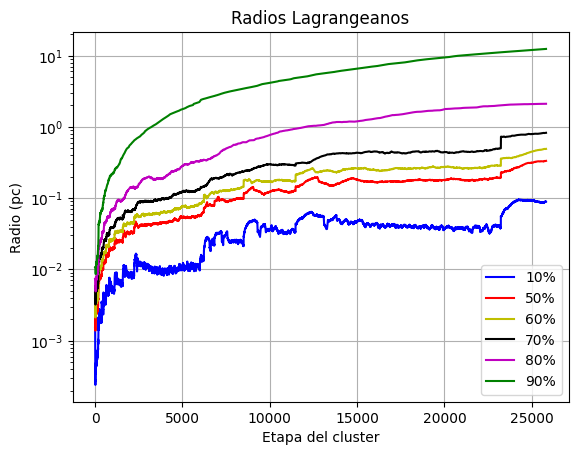

In [ ]:
file_path2= os.path.join(folder_path, 'MMtrakc75radiLMtrack.csv')
DATA2 = pd.read_csv(file_path2)

x=np.linspace(0,25818,25818)

plt.figure()
plt.yscale('log')
plt.plot(x,data['RL_10%'],label ='10%',color = 'b'  )
plt.plot(x,data['RL_50%'],label ='50%',color = 'r'  )
plt.plot(x,DATA2['RL 60%'],label ='60%',color = 'y'  )
plt.plot(x,DATA2['RL 70%'],label ='70%',color = 'k'  )
plt.plot(x,DATA2['RL 80%'],label ='80%',color = 'm' )
plt.plot(x,data['RL_90%'],label ='90%',color = 'g'  )
plt.title('Radios Lagrangeanos')
plt.xlabel('Etapa del cluster')
plt.ylabel('Radio (pc)')

plt.legend()



plt.grid(True)
plt.show()

NameError: name 'x' is not defined

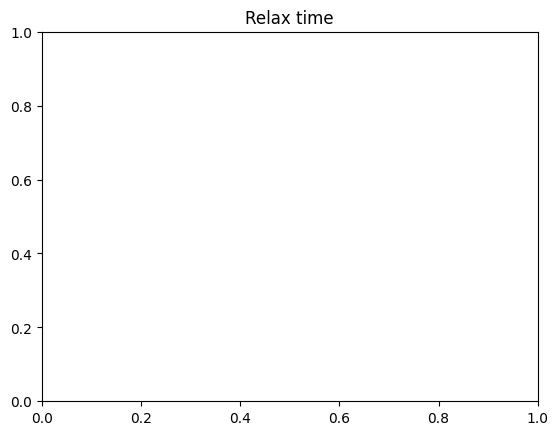

In [ ]:
plt.figure()
plt.title('Relax time')
plt.scatter(x,DATA2['Relax time']*3.1688*10-8,color = 'b'  )
plt.xlabel('Etapa del cluster')
plt.ylabel('Tiempo (Yr)')
plt.grid(True)
plt.show()

In [ ]:
star.total_mass().as_quantity_in(units.MSun)




quantity<100000.0 MSun>

In [ ]:
masas = s25817.mass.value_in(units.MSun)

indice = np.where(masas == np.min(s25817.mass.value_in(units.MSun)))
print(indice)



(array([   0,    1,    2, ..., 1682, 1683, 1684]),)


In [ ]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

IndexError: invalid index to scalar variable.

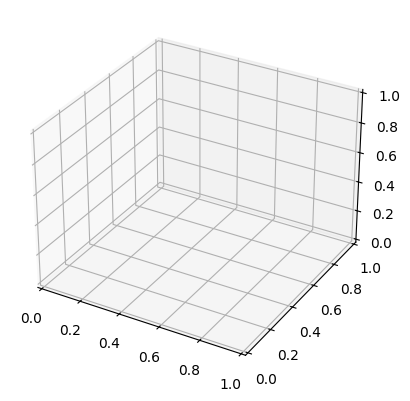

In [ ]:
# Crear la figura y el eje
# Configurar la figura y los ejes
# Número de partículas
n_particles = len(DATA2.columns) // 3  # Asumiendo columnas MMx1, MMy1, MMz1, ..., MMzN

# Construir listas de datos
x = [DATA2['MMx'][i] for i in range(1, n_particles + 1)]
y = [DATA2['MMy'][i] for i in range(1, n_particles + 1)]
z = [DATA2['MMz'][i] for i in range(1, n_particles + 1)]

# Configurar la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Gráfica inicial
scatter = ax.scatter([xi[0] for xi in x], [yi[0] for yi in y], [zi[0] for zi in z], c='blue', s=20)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Animación 3D de partículas")

# Función de actualización
def update(frame):
    scatter._offsets3d = ([xi[frame] for xi in x],
                          [yi[frame] for yi in y],
                          [zi[frame] for zi in z])
    return scatter,

# Crear la animación
n_frames = len(DATA2)  # Total de cuadros
ani = FuncAnimation(fig, update, frames=n_frames, interval=100, blit=False)

# Mostrar
plt.show()

In [ ]:
ani.save("animacion_3d_particulas.gif", writer="pillow")

IndexError: list index out of range